In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from xgboost import XGBClassifier
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('StreamlitData.csv',index_col=0)
data.head()

,Depression,Gender,Age,Race,Citizenship,Education Level,Marital Status,Household Size,Pregnant,Birth Place,...,Rx Insulin Regular,Rx Days Insulin Regular,Rx Memantine,Rx Days Memantine,Rx Diphenhydramine,Rx Days Diphenhydramine,Rx Minocycline,Rx Days Minocycline,Rx Methocarbamol,Rx Days Methocarbamol
SEQN,,,,,,,,,,,,,,,,,,,,,
31131,Not Depressed,Female,44,Black,Citizen,Some College or AA Degree,Married,4,No,USA,...,No,0.0,No,0.0,No,0.0,No,0.0,No,0.0
31132,Not Depressed,Male,70,White,Citizen,College Graduate or Above,Married,2,Missing,USA,...,No,0.0,No,0.0,No,0.0,No,0.0,No,0.0
31134,Not Depressed,Male,73,White,Citizen,High School,Married,2,Missing,USA,...,No,0.0,No,0.0,No,0.0,No,0.0,No,0.0
31139,Not Depressed,Female,18,Other Hispanic,Citizen,Missing,Never Married,3,No,USA,...,No,0.0,No,0.0,No,0.0,No,0.0,No,0.0
31143,Not Depressed,Male,19,White,Citizen,Missing,Never Married,3,Missing,USA,...,No,0.0,No,0.0,No,0.0,No,0.0,No,0.0


## EDA

In [3]:
#Checking Null Values
data.isna().sum()

Depression                 0
Gender                     0
Age                        0
Race                       0
Citizenship                0
                          ..
Rx Days Diphenhydramine    0
Rx Minocycline             0
Rx Days Minocycline        0
Rx Methocarbamol           0
Rx Days Methocarbamol      0
Length: 491, dtype: int64

<AxesSubplot:xlabel='Depression', ylabel='count'>

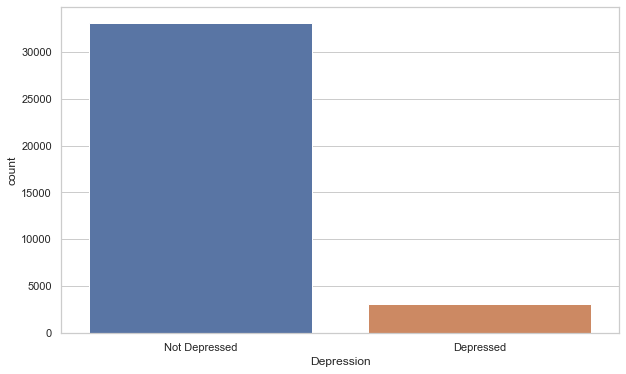

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data['Depression'])

Text(0.5, 1.0, 'Age Counts')

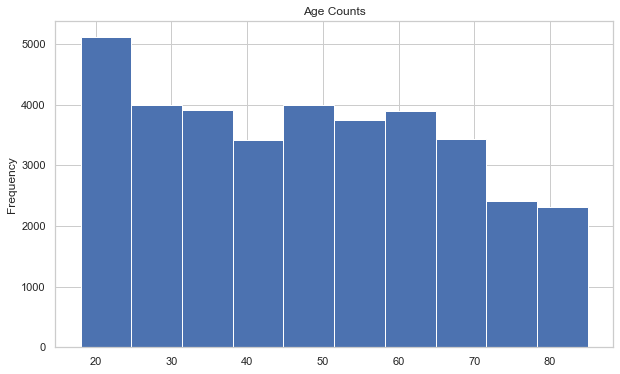

In [5]:
plt.figure(figsize=(10,6))
data['Age'].plot(kind='hist')
plt.title('Age Counts')

<AxesSubplot:xlabel='Gender', ylabel='count'>

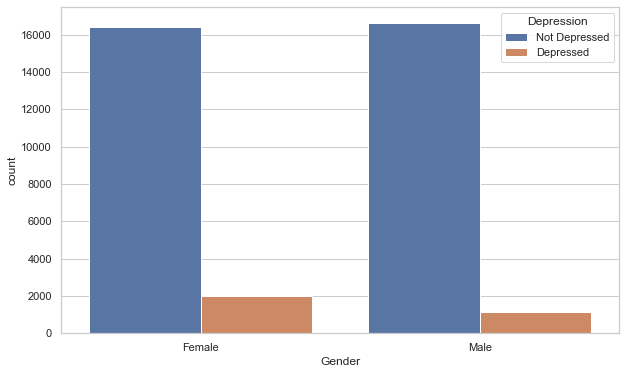

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data['Gender'],hue=data['Depression'])

<AxesSubplot:xlabel='Race', ylabel='count'>

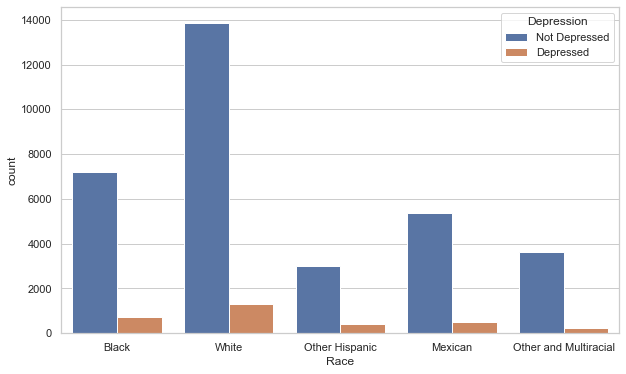

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data['Race'],hue=data['Depression'])

In [8]:
data['Education Level'].unique()

array(['Some College or AA Degree', 'College Graduate or Above',
       'High School', 'Missing', '9-11th Grade', 'Less Than 9th Grade'],
      dtype=object)

In [9]:
data['Education Level'].mode()

0    Some College or AA Degree
dtype: object

In [10]:
data['Education Level']=data['Education Level'].replace('Missing','Some College or AA Degree')

<AxesSubplot:xlabel='Education Level', ylabel='count'>

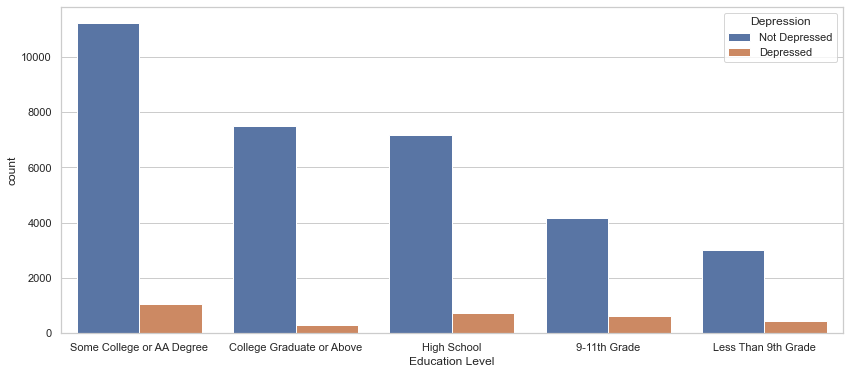

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(data['Education Level'],hue=data['Depression'])

<AxesSubplot:xlabel='Veteran', ylabel='count'>

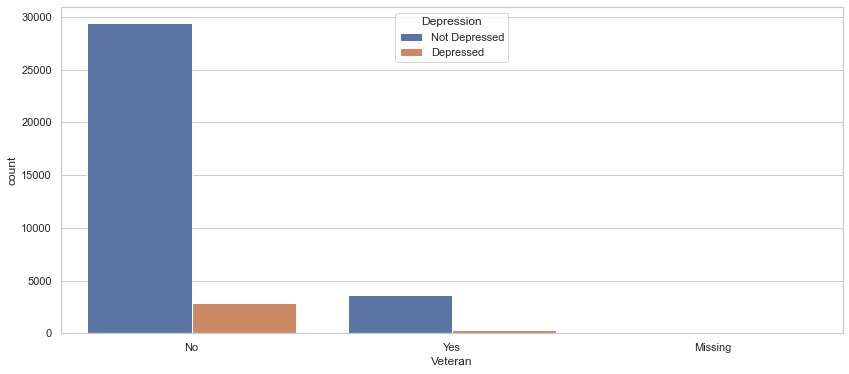

In [12]:
plt.figure(figsize=(14,6))
sns.countplot(data['Veteran'],hue=data['Depression'])

<AxesSubplot:xlabel='Asthma', ylabel='count'>

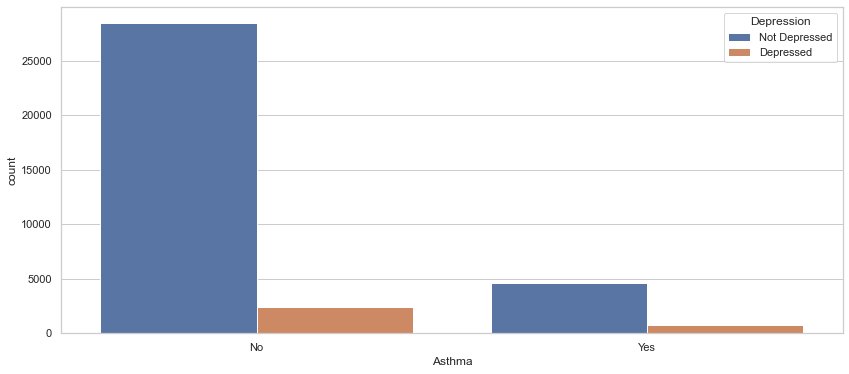

In [13]:
plt.figure(figsize=(14,6))
sns.countplot(data['Asthma'],hue=data['Depression'])

<AxesSubplot:xlabel='Anemia', ylabel='count'>

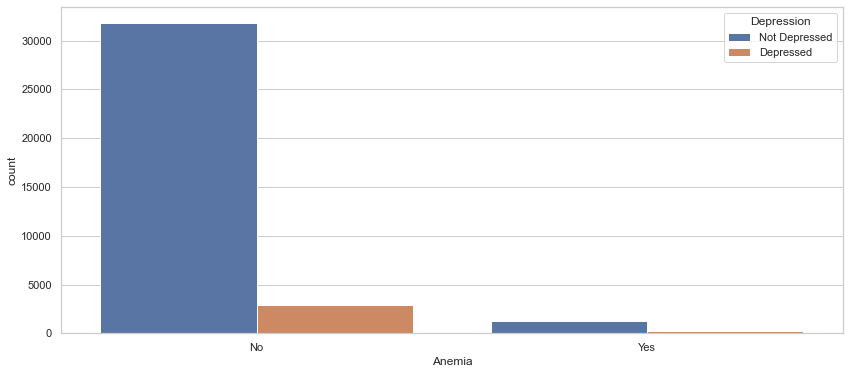

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(data['Anemia'],hue=data['Depression'])

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

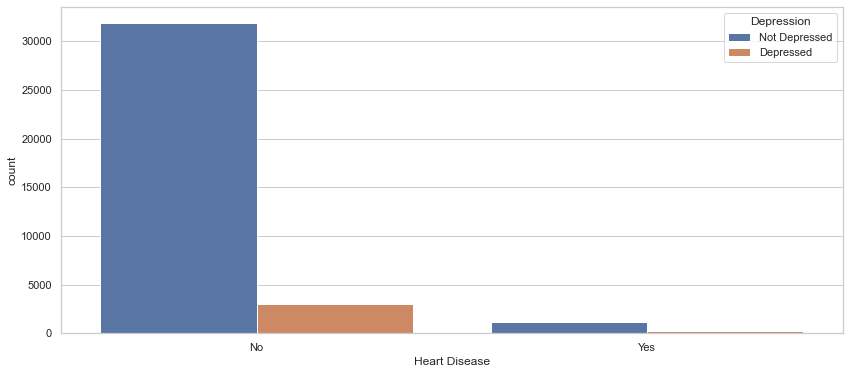

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(data['Heart Disease'],hue=data['Depression'])

<AxesSubplot:xlabel='Cancer', ylabel='count'>

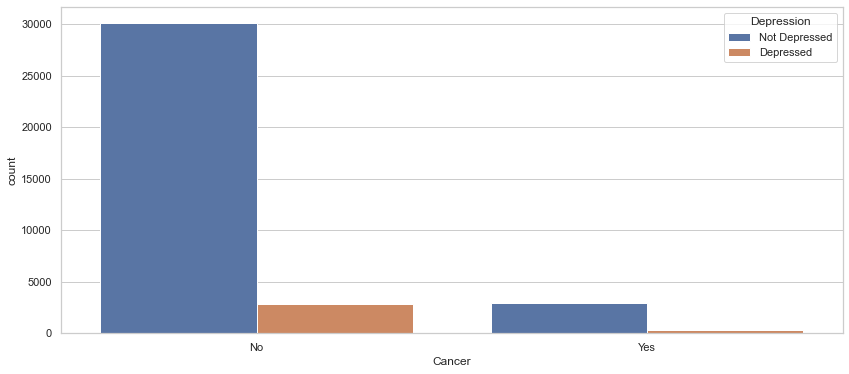

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(data['Cancer'],hue=data['Depression'])

In [17]:
data['Marital Status'].mode()

0    Married
dtype: object

In [18]:
data['Marital Status']=data['Marital Status'].replace('Missing','Married')

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

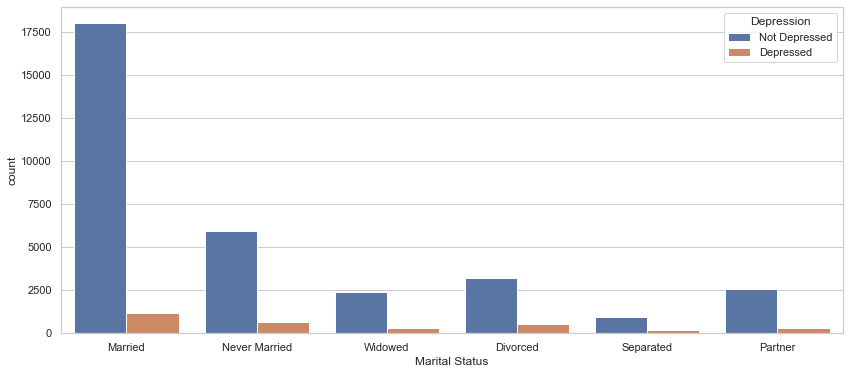

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(data['Marital Status'],hue=data['Depression'])

In [20]:
object_types=data.select_dtypes(include=['object']).columns
object_types

Index(['Depression', 'Gender', 'Race', 'Citizenship', 'Education Level',
       'Marital Status', 'Pregnant', 'Birth Place', 'Veteran',
       'Household Income',
       ...
       'Rx Prednisolone', 'Rx Isosorbide',
       'Rx Drospirenone, Ethinyl Estradiol', 'Rx Acetaminophen, Propoxyphene',
       'Rx Penicillin', 'Rx Insulin Regular', 'Rx Memantine',
       'Rx Diphenhydramine', 'Rx Minocycline', 'Rx Methocarbamol'],
      dtype='object', length=248)

In [21]:
le=LabelEncoder()
for i in object_types:
    data[i]=le.fit_transform(data[i])

In [22]:
x=data.drop(['Depression'],axis=1)
y=data.Depression

In [23]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=42)

## LogisticRegression

In [24]:
logreg=LogisticRegression()
logreg.fit(trainx,trainy)
log_pred_test=logreg.predict(testx)
log_pred_train=logreg.predict(trainx)

In [25]:
print(accuracy_score(testy,log_pred_test))
print(accuracy_score(trainy,log_pred_train))

0.9111969111969112
0.9108835798255593


In [26]:
print(classification_report(testy,log_pred_test))

              precision    recall  f1-score   support

           0       0.35      0.04      0.07       621
           1       0.92      0.99      0.95      6631

    accuracy                           0.91      7252
   macro avg       0.63      0.52      0.51      7252
weighted avg       0.87      0.91      0.88      7252



## RandomForestClassifier

In [27]:
rf=RandomForestClassifier(random_state=42)
rf.fit(trainx,trainy)
rf_pred_test=rf.predict(testx)
rf_pred_train=rf.predict(trainx)

In [28]:
print(accuracy_score(testy,rf_pred_test))
print(accuracy_score(trainy,rf_pred_train))

0.9174020959735245
1.0


In [29]:
rf_param_grid={'n_estimators':[100,150,200],'criterion':["gini", "entropy"],'max_depth':[2,5,7],
    'min_samples_split':[3,4,5],'min_samples_leaf':[2,4,5]}

In [30]:
grid=GridSearchCV(estimator=rf, param_grid=rf_param_grid, n_jobs=-1, cv=4,verbose=1,
                  scoring='accuracy')

In [31]:
grid.fit(trainx,trainy)
grid.best_params_

Fitting 4 folds for each of 162 candidates, totalling 648 fits


{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [32]:
grid_rf=RandomForestClassifier(criterion='gini',min_samples_leaf=2,max_depth=7, min_samples_split=5
                              ,n_estimators=100,random_state=42)
grid_rf.fit(trainx,trainy)
grid_pred_rf=grid_rf.predict(testx)
grid_pred_rf1=grid_rf.predict(trainx)

In [33]:
print(accuracy_score(testy,grid_pred_rf))
print(accuracy_score(trainy,grid_pred_rf1))

0.9143684500827358
0.9139862791739924


In [34]:
print(classification_report(testy,rf_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.06      0.10       621
           1       0.92      1.00      0.96      6631

    accuracy                           0.92      7252
   macro avg       0.82      0.53      0.53      7252
weighted avg       0.90      0.92      0.88      7252



In [35]:
confusion_matrix(testy,rf_pred_test)

array([[  35,  586],
       [  13, 6618]], dtype=int64)

## DecisionTreeClassifier

In [36]:
dc=DecisionTreeClassifier(random_state=49)
dc.fit(trainx,trainy)
dc_pred=dc.predict(testx)
dc_pred1=dc.predict(trainx)


In [37]:
print(accuracy_score(testy,dc_pred))
print(accuracy_score(trainy,dc_pred1))

0.8665195808052951
1.0


In [38]:
print(classification_report(testy,dc_pred))

              precision    recall  f1-score   support

           0       0.25      0.28      0.26       621
           1       0.93      0.92      0.93      6631

    accuracy                           0.87      7252
   macro avg       0.59      0.60      0.59      7252
weighted avg       0.87      0.87      0.87      7252



In [39]:
dc_param_grid={
    'criterion':["gini", "entropy"],'max_depth':[1,2,3],
    'max_features':[1,2,3,4],
    'max_leaf_nodes':[2,3],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2,3]}

In [40]:
grid1=GridSearchCV(estimator=dc, param_grid=dc_param_grid, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')
grid1.fit(trainx,trainy)
grid1.best_params_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [41]:
grid_dc=DecisionTreeClassifier(criterion='gini',max_depth=1,max_features=1
                               ,max_leaf_nodes=2,min_samples_leaf=1, min_samples_split=2,random_state=42)

In [42]:
grid_dc.fit(trainx,trainy)
grid_dc_pred=grid_dc.predict(testx)
grid_dc_pred1=grid_dc.predict(trainx)

In [43]:
print(accuracy_score(testy,grid_dc_pred))
print(accuracy_score(trainy,grid_dc_pred1))

0.9143684500827358
0.9121936084393423


In [44]:
print(classification_report(testy,grid_dc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       621
           1       0.91      1.00      0.96      6631

    accuracy                           0.91      7252
   macro avg       0.46      0.50      0.48      7252
weighted avg       0.84      0.91      0.87      7252



## ExtraTreeClassifier

In [45]:
extr=ExtraTreeClassifier(random_state=42)

extr.fit(trainx,trainy)

ExtraTreeClassifier(random_state=42)

ExtraTreeClassifier(random_state=42)

In [46]:
extr_dc_pred=extr.predict(testx)
extr_dc_pred1=extr.predict(trainx)

print(accuracy_score(testy,extr_dc_pred))
print(accuracy_score(trainy,extr_dc_pred1))

0.866657473800331
1.0


In [47]:
print(classification_report(testy,extr_dc_pred))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23       621
           1       0.93      0.93      0.93      6631

    accuracy                           0.87      7252
   macro avg       0.58      0.58      0.58      7252
weighted avg       0.87      0.87      0.87      7252



## KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(trainx,trainy)

KNeighborsClassifier(n_neighbors=15)

In [49]:
pred_neigh=neigh.predict(testx)
pred_neigh1=neigh.predict(trainx)

print(accuracy_score(testy,pred_neigh))
print(accuracy_score(trainy,pred_neigh1))

0.9142305570877
0.9122970317509567


In [50]:
print(classification_report(testy,pred_neigh))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       621
           1       0.91      1.00      0.96      6631

    accuracy                           0.91      7252
   macro avg       0.46      0.50      0.48      7252
weighted avg       0.84      0.91      0.87      7252



## Conclusion